In [1]:
from xpbd_softbody import XPBDSoftbody
import pyvista as pv
import config as cfg
import matplotlib.pyplot as plt
import torch
from xpbd_softbody_layer import XPBDStep
import numpy as np

In [2]:
N_skin = 100
N_bandage = 100

In [3]:
softbody = XPBDSoftbody()
mesh = softbody.add_thinshell(pv.Plane(), n_surf=N_skin)
bandage_mesh = mesh.copy()
softbody.init_states()
softbody.init_dist_constraints()
softbody.double_area(torch.arange(0, 0+N_bandage))
softbody.init_spring_boundary(N_skin)
softbody.init_boundary_constraints(N_skin, N_skin + N_bandage)
softbody.fix_virtual_boundary(N_skin)
softbody.add_boundary_constraints(torch.arange(0, 0+N_bandage), torch.arange(N_skin, N_skin+N_bandage))
softbody.init_rigid_constraints(torch.arange(N_skin, N_skin+N_bandage), N_start=N_skin, rad=0.2)
# softbody.set_gravity(torch.tensor([0, 0, -9.8]).to(cfg.device))

# softbody.init_grasp_constraints(softbody.V[1], radius=1e-3)

In [96]:
# softbody.init_grasp_constraints(loc=softbody.V[99], N_start=N_skin, N_end=N_skin + N_bandage, radius=1e-3)
# softbody.init_grasp_constraints(loc=softbody.V[0], N_start=0, N_end=N_skin, radius=1e-3)

In [16]:
softbody.C_boundary_list

[tensor([[  0, 200],
         [  1, 201],
         [  2, 202],
         [  3, 203],
         [  4, 204],
         [  5, 205],
         [  6, 206],
         [  7, 207],
         [  8, 208],
         [  9, 209],
         [ 10, 210],
         [ 11, 211],
         [ 12, 212],
         [ 13, 213],
         [ 14, 214],
         [ 15, 215],
         [ 16, 216],
         [ 17, 217],
         [ 18, 218],
         [ 19, 219],
         [ 20, 220],
         [ 21, 221],
         [ 22, 222],
         [ 23, 223],
         [ 24, 224],
         [ 25, 225],
         [ 26, 226],
         [ 27, 227],
         [ 28, 228],
         [ 29, 229],
         [ 30, 230],
         [ 31, 231],
         [ 32, 232],
         [ 33, 233],
         [ 34, 234],
         [ 35, 235],
         [ 36, 236],
         [ 37, 237],
         [ 38, 238],
         [ 39, 239],
         [ 40, 240],
         [ 41, 241],
         [ 42, 242],
         [ 43, 243],
         [ 44, 244],
         [ 45, 245],
         [ 46, 246],
         [ 47

In [98]:
# softbody.C_boundary_list[0] = softbody.C_boundary_list[0][100:]

In [99]:
# softbody.C_init_boundary_d_list[0] = softbody.C_init_boundary_d_list[0][100:]

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


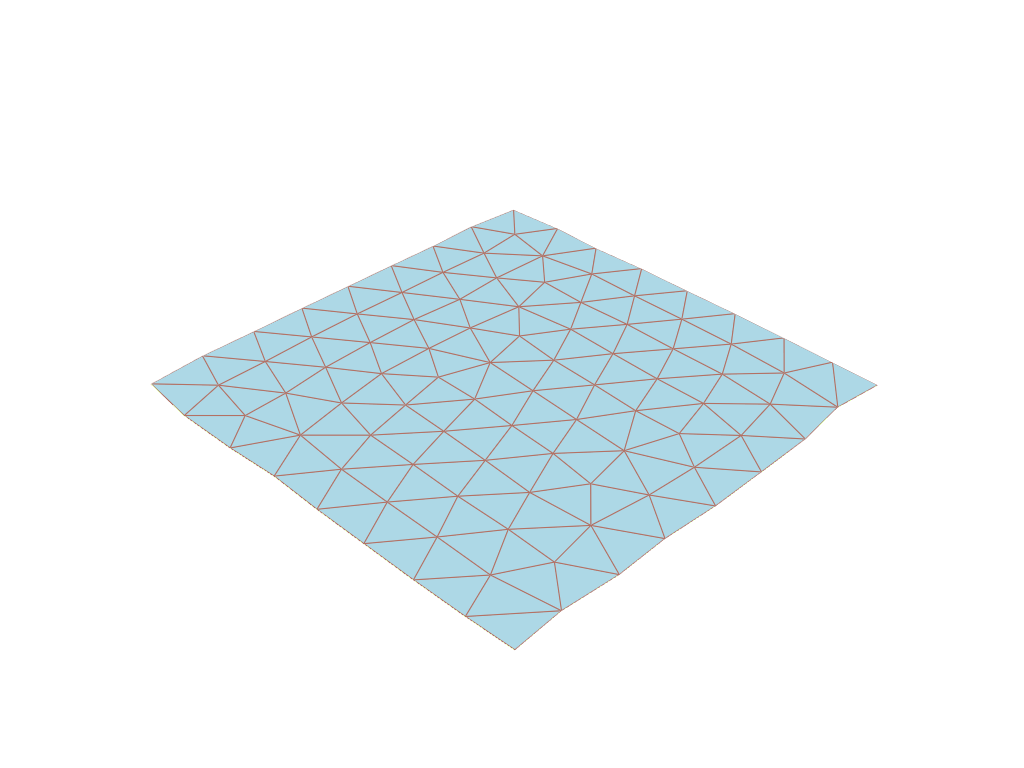

In [10]:
pl = pv.Plotter()
pl.add_mesh(bandage_mesh, color = 'r', show_edges=True, edge_color='#bff164ff',  lighting=False,style='surface', cmap='jet', opacity=0.5)
pl.add_mesh(mesh, show_edges=True, edge_color='#b37164ff',  lighting=False,style='surface', cmap='jet')
pl.show()

In [11]:
cloth_dist_stiffness = 1e3
V_boundary_stiffness = 1e-10
V_dist_stiffness = torch.ones_like(softbody.V_mass).to(cfg.device) * cloth_dist_stiffness
V_boundary_stiffness = torch.ones((N_skin + N_bandage, 1)).to(cfg.device) * V_boundary_stiffness
V_boundary_stiffness[N_skin:N_skin+N_bandage] = 1e9
V_shape_stiffness = torch.ones_like(softbody.V_mass).to(cfg.device)*7

In [12]:
V_boundary_stiffness

tensor([[1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1.0000e-10],
        [1

In [13]:
softbody.C_init_boundary_d_list[0].shape

torch.Size([100, 1])

In [14]:
softbody.C_shape_list

[tensor([160, 159, 150, 169, 170, 168, 177, 179, 187, 190, 161, 180, 171]),
 tensor([157, 156, 167, 168, 166, 176, 185]),
 tensor([120, 121, 107, 106, 108, 109, 123, 110, 112, 111, 122, 132]),
 tensor([183, 197, 194, 174, 184, 196, 175, 199]),
 tensor([103, 102, 100, 117, 101]),
 tensor([113, 116, 126, 115]),
 tensor([179, 189, 190, 172, 182, 192, 193, 191, 181, 180, 171, 195]),
 tensor([103, 102, 101, 119, 104, 105, 107, 106]),
 tensor([118, 128, 138, 129, 119, 139, 130, 105, 120, 131, 140, 141, 149]),
 tensor([147, 128, 137, 127, 138, 129, 146, 157]),
 tensor([136, 152, 135, 143, 145, 144, 154, 134, 153, 164, 155, 165]),
 tensor([152, 172, 163, 171, 153, 173, 183, 164, 174, 184, 175, 165]),
 tensor([121, 141, 123, 112, 122, 124, 132, 133, 143, 142, 144, 134, 151]),
 tensor([177, 186, 187, 188, 189, 176, 178]),
 tensor([147, 128, 138, 139, 159, 146, 148, 157, 149, 169, 158, 167]),
 tensor([141, 160, 150, 152, 143, 142, 151, 172, 162, 163, 161, 181, 180, 171,
         153]),
 tensor([1

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


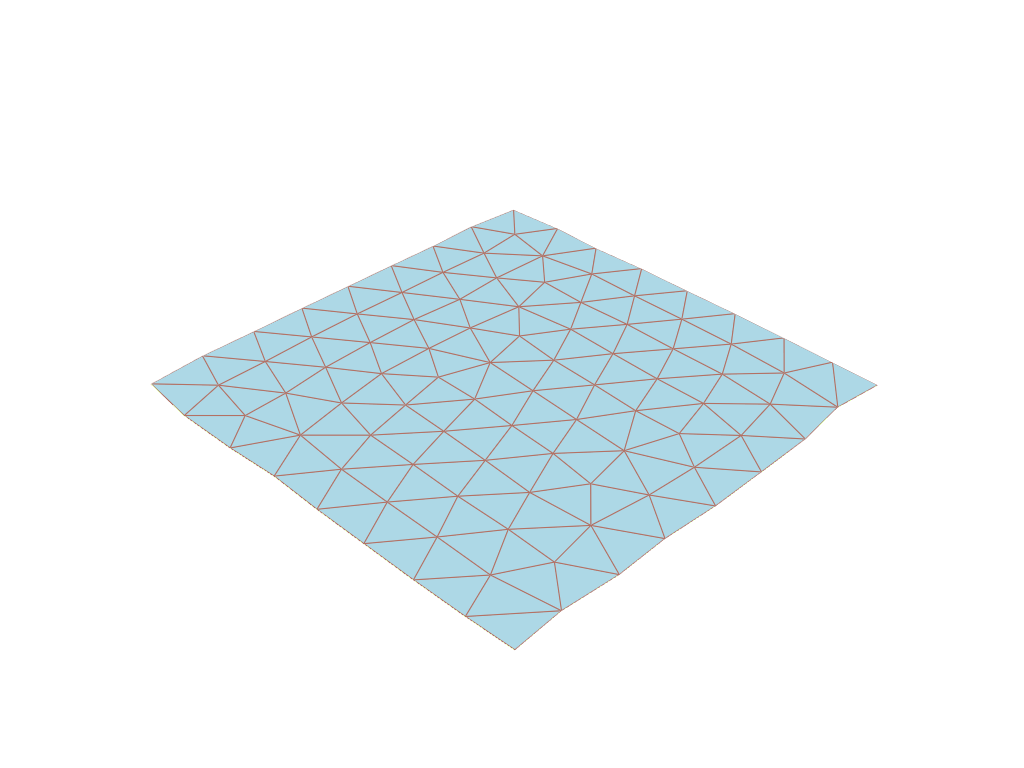

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


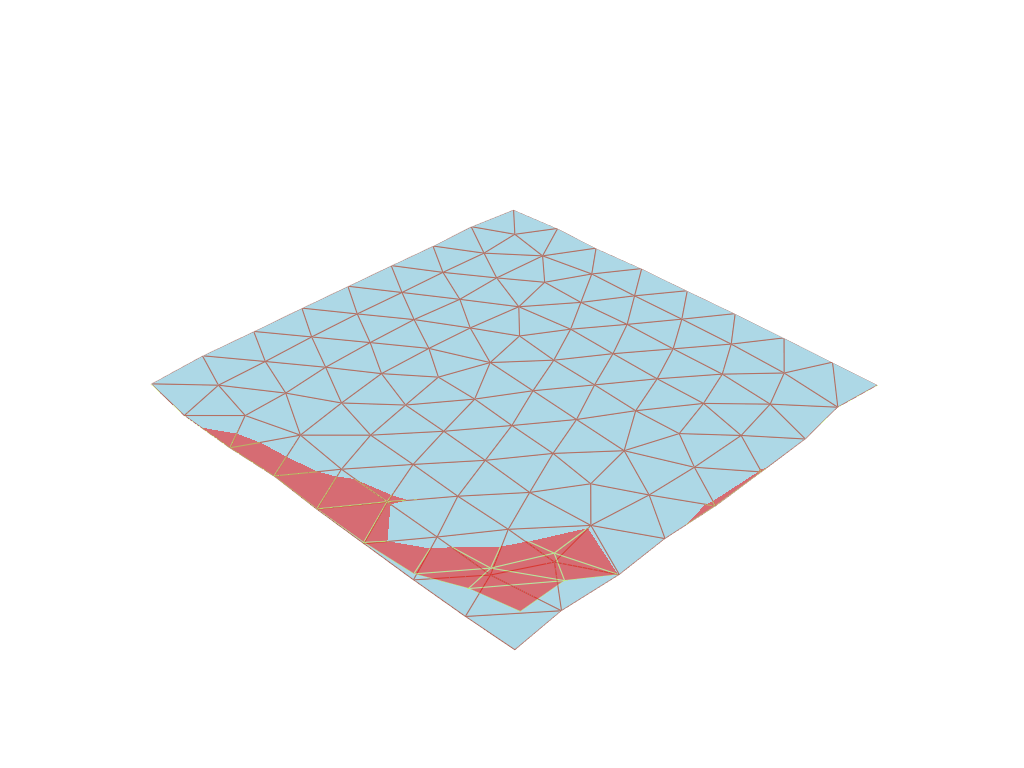

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


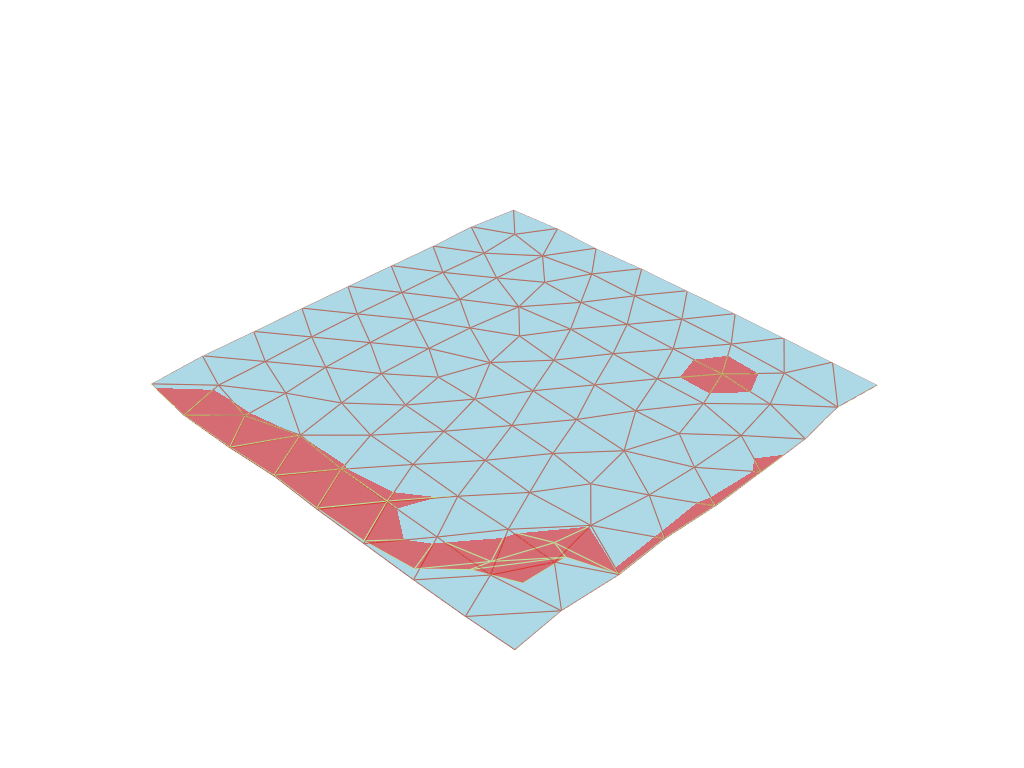

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


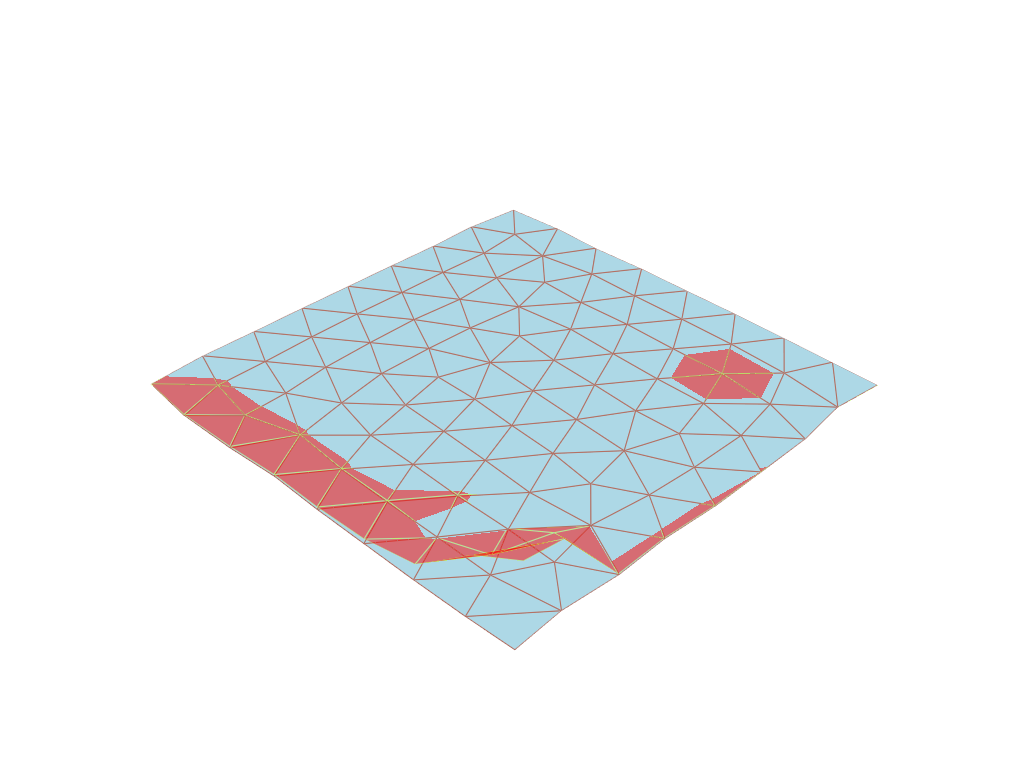

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


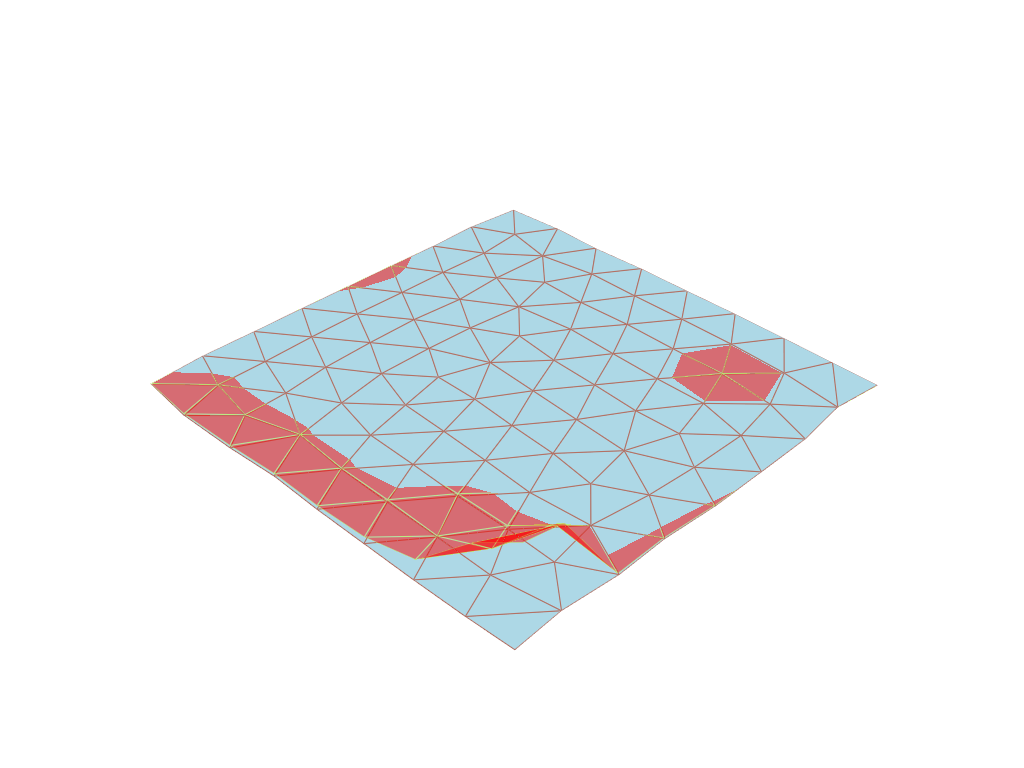

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


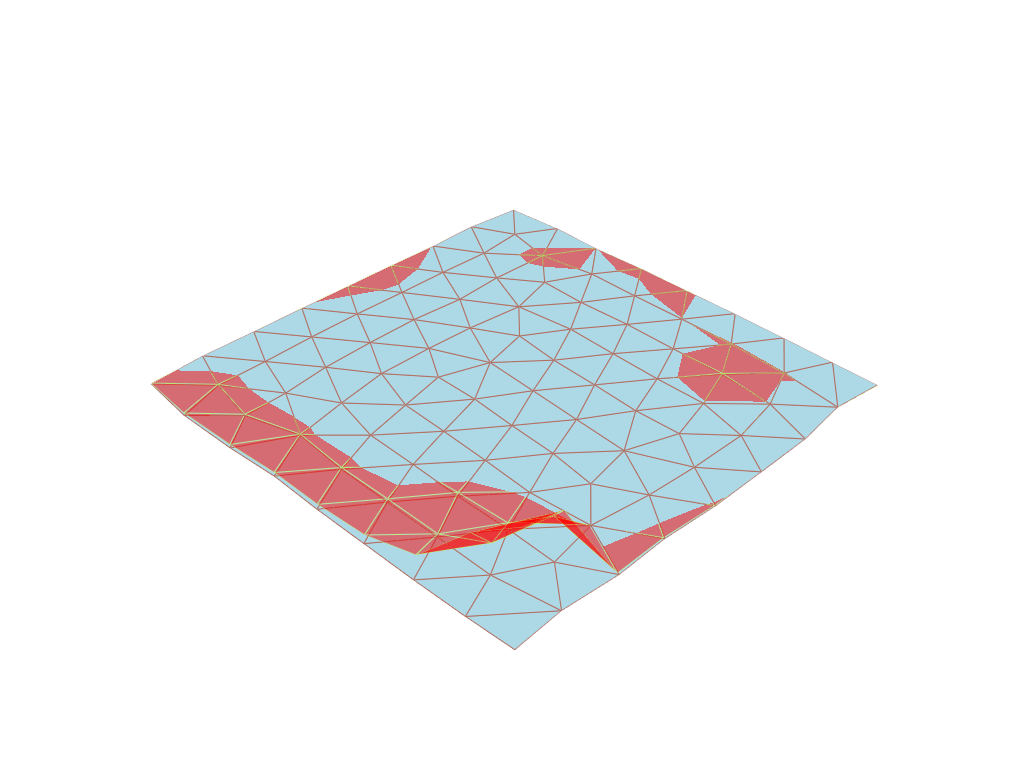

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


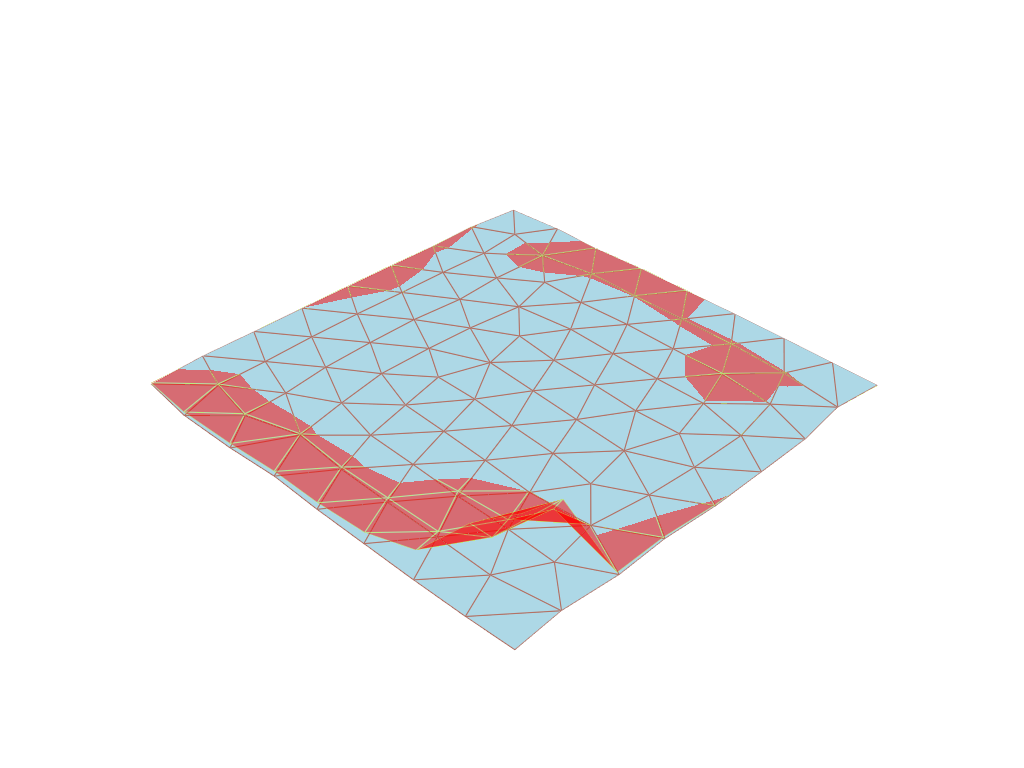

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


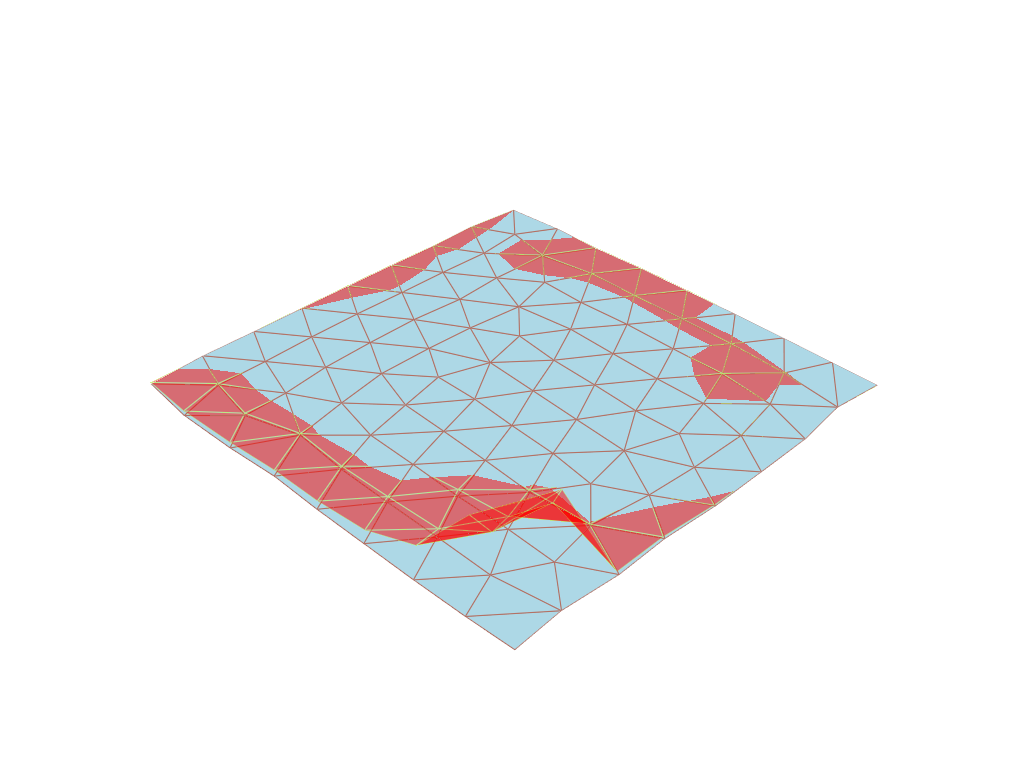

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


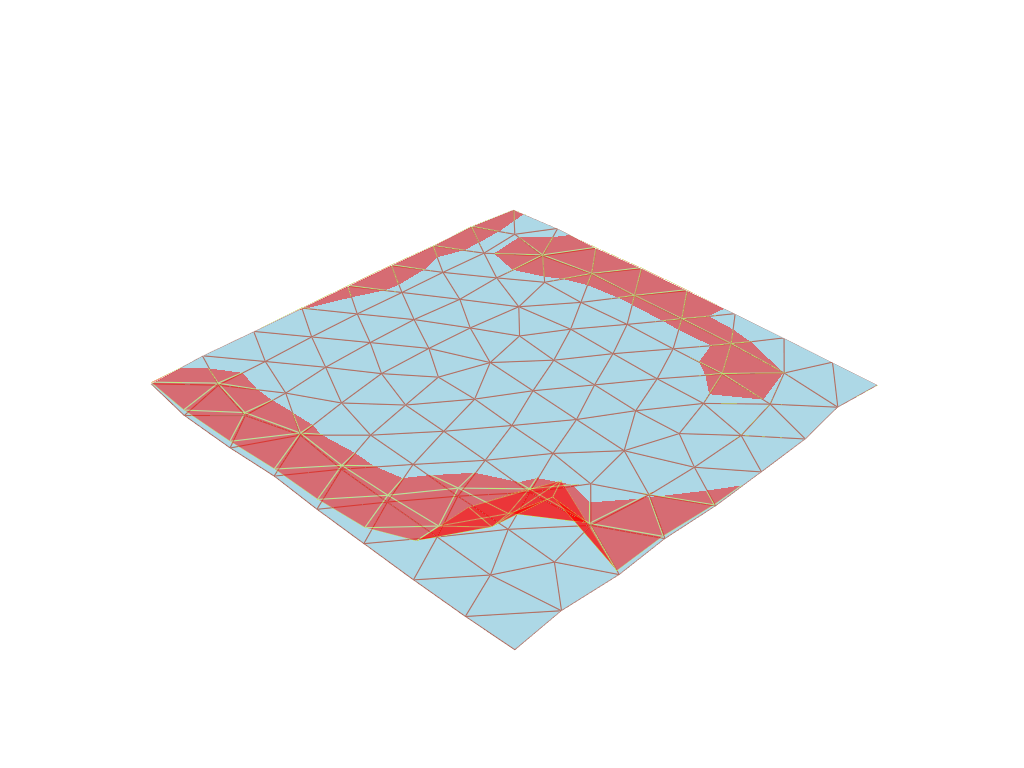

/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/youcheng/anaconda3/envs/py_pbd/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


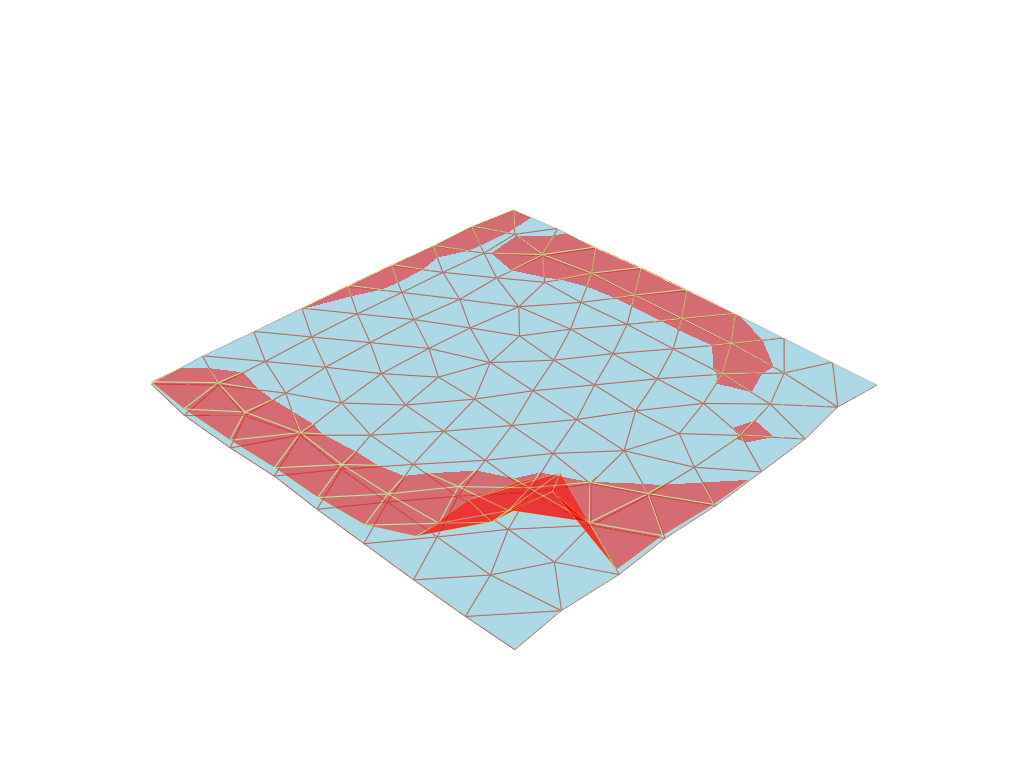

In [15]:
for i in range(10):
    softbody.V[199][2] += 1
    softbody.V[199][0] -= 1
    softbody.V[199][1] -= 1
    step_ref = XPBDStep(softbody,
                V_dist_stiffness=V_dist_stiffness, 
                V_shape_stiffness=V_shape_stiffness,
                V_boundary_stiffness=V_boundary_stiffness, 
                dt=cfg.dt,
                substep=cfg.substep,
                iteration=cfg.iteration,
                quasi_static=cfg.quasi_static,
                plane_height=cfg.ground_plane_height, 
                use_shape_matching=True,
                use_spring_boundary=True,
                use_dist=True) #cfg.use_spring_boundary
    V_ref, V_velocity_ref = step_ref.forward(softbody.V, softbody.V_velocity)
    softbody.V = V_ref.clone()
    softbody.V_velocity = V_velocity_ref.clone()
    mesh.points = softbody.V[:N_skin].cpu().numpy()
    bandage_mesh.points = softbody.V[N_skin:N_bandage+N_skin].cpu().numpy()
    # pl.remove_actor(bandage_actor)
    # bandage_actor = pl.add_points(softbody.V[N_skin:N_skin+N_bandage].cpu().numpy(), color='r')
    pl.show()

In [106]:
step_ref.project_list[-1].V_compliance

tensor([[1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1.0000e+14],
        [1

In [111]:
step_ref.project_list[-1].C_dist.shape

torch.Size([200, 2])

In [121]:
A = np.array([[0, 1],
              [1, 0]])

In [122]:
R = np.zeros(4)

In [123]:
R[A[:, 0]] = 1
R[A[:, 1]] = 0

In [124]:
R

array([0., 0., 0., 0.])